In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [127]:
pd.options.display.max_columns = 50

In [89]:
data_df = pd.read_csv('CandidateSummaryAction0.csv')

In [321]:
summary = pd.DataFrame({'null_values': data_df.isnull().sum(), 'datatypes' :data_df.dtypes})
summary = summary.reset_index()

In [20]:
second_data = pd.read_html('https://web.archive.org/web/20170118212350/http://www.fec.gov/finance/disclosure/metadata/metadataforcandidatesummary.shtml')

In [24]:
data_dictionary = second_data[2]
data_dictionary.columns = data_dictionary.iloc[0, :]

In [304]:
data_dic = data_dictionary.drop([0, 1], axis = 0)
data_dic = data_dic.reset_index(drop = True)
data_dic.head()

,Tag,Field Name,Data Type,Description,Range,Explanation
0,can_id,Candidate Id,Character,NaN,9 characters,First character indicates office sought - H=Ho...
1,can_nam,Candidate Name,Character,Name of candidate,Max 90 characters,NaN
2,can_off,Candidate Office,Text,office abbreviation,1 character,P=President; S=Senate; H=House
3,can_off_sta,Candidate Office State,Character,Postal abbreviation for state,2 characters,NaN
4,can_off_dis,Candidate Office District,Number,District number for House candidates,2 digits,NaN


In [30]:
data_dic.to_csv('data_dic.csv')

In [305]:
frame = [['winner', 0,'object',0,0,0], ['votes', 0,'float',0,0,0]]

winners_votes = pd.DataFrame(frame, columns = data_dic.columns, index = [49, 50])
data_dic = pd.concat([data_dic, winners_votes], axis = 0)
data_dic.head()

,Tag,Field Name,Data Type,Description,Range,Explanation
0,can_id,Candidate Id,Character,NaN,9 characters,First character indicates office sought - H=Ho...
1,can_nam,Candidate Name,Character,Name of candidate,Max 90 characters,NaN
2,can_off,Candidate Office,Text,office abbreviation,1 character,P=President; S=Senate; H=House
3,can_off_sta,Candidate Office State,Character,Postal abbreviation for state,2 characters,NaN
4,can_off_dis,Candidate Office District,Number,District number for House candidates,2 digits,NaN


In [322]:
summary['correct_dtypes'] = data_dic['Data Type']
summary

,index,null_values,datatypes,correct_dtypes
0,can_id,0,object,Character
1,can_nam,0,object,Character
2,can_off,0,object,Text
3,can_off_sta,0,object,Character
4,can_off_dis,2,float64,Number
5,can_par_aff,1,object,Character
6,can_inc_cha_ope_sea,2,object,Character
7,can_str1,25,object,Text
8,can_str2,1692,object,Text
9,can_cit,1,object,Text


In [62]:
curr_col = summary[summary['correct_dtypes'] == 'Currency']['index'].to_list()

In [90]:
# conerting currency columns to floats

def split_join(col):
    if type(col) == str:
        l = []
        for string in re.split('', col):
            if string.isdigit():
                pass
            else:
                l.append(string)
        l.remove('.')
        split_criterion = '[' + ''.join(list(set(l))) + ']'
        output = ''.join(re.split(split_criterion, col))
        return float(output)
    else:
        return col
for col in curr_col:
    data_df[col] = data_df[col].apply(split_join)
data_df

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,60109.57,175613.35,1074949.50,907156.21,1125000.00,NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,105687.23,1406719.06,1298831.83,NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,35645.09,650855.38,656210.29,60000.00,NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,83815.78,399122.61,4938943.74,5055942.15,NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,83690.60,181338.23,1197676.61,949488.98,4401.75,NaN,1/1/2015,10/19/2016,Y,277390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,P60005931,"BUTTOCKS, SYDNEYS VOLUPTOUS",P,US,0.0,IND,OPEN,143 HIGHLAND AVENUE,NaN,BUFFALO,...,5000.00,5000.00,NaN,NaN,NaN,NaN,3/3/2015,3/31/2015,NaN,NaN
1810,S6CA00568,"MOLNAR, ROBERT",S,CA,0.0,REP,OPEN,PO BOX 321231,NaN,LOS GATOS,...,1000.00,NaN,1000.00,1000.00,NaN,NaN,1/1/2015,3/31/2015,NaN,NaN
1811,S6MD03524,"HOLMES, GREGORY",S,MD,0.0,REP,OPEN,13601 MACDERNUT CT,NaN,UPPER MARLBORO,...,NaN,NaN,NaN,NaN,NaN,NaN,8/29/2017,2/1/2015,NaN,NaN
1812,H6AS00031,"HUNKIN-FINAU, VAITINASA SALU",H,AS,NaN,DEM,NaN,PO BOX 252 VAILOAUTA,NaN,PAGO PAGO,...,1058.44,4561.00,41670.00,38167.44,NaN,NaN,7/1/2016,10/19/2016,NaN,NaN


In [318]:
def get_high_correlations(df, correlation = 0.5):
    # it gets the number (n) pairs with the highest correlation
    # ##########
    matrix = df.corr()
    matrix = matrix * np.tri(*matrix.values.shape, k=-1).T
    # stack the matrix
    matrix = matrix.stack()
    matrix = matrix.reindex(matrix.abs().sort_values(ascending = False).index).reset_index()
    
    # assign names to columns
    matrix.columns = ['var1', 'var2', 'correlation']
    matrix= matrix[matrix['correlation'] != 0]
    matrix = matrix[matrix['correlation'] >= correlation]
    return matrix
    

In [329]:
# check if columns that have high correlations, have low number of missing values
# check for the columns that appear most having high correlations
from collections import Counter

def check_highest_corr(df, num_null = 200):
    
    high_correlations = get_high_correlations(df)
    high_corr_list1 = high_correlations['var1'].to_list()
    high_corr_list2 = high_correlations['var2'].to_list()

    high_corr_list = high_corr_list1  + high_corr_list2
    
    # count the columns to get the number of times they appear as high correlations
    dic1 = Counter(high_corr_list)
    
    high_dic_keys = [key for key, value in dic1.items() if value >= 1]

    # get columns with not more than 200 missing values
    summary_currency = summary[summary['correct_dtypes'] == 'Currency']
    summary_currency = summary_currency.sort_values('null_values')
    summary_currency = summary_currency[summary_currency['null_values'] <= num_null]
    low_null_values = summary_currency['index'].to_list()

    
    return list(set(high_dic_keys).intersection(set(low_null_values)))



In [330]:
retained_list = check_highest_corr(df_currency, 200)

In [331]:
# get data with the retained lists of columns and join to other non currency columns

df1 = data_df.drop(columns = curr_col)
df2 = data_df[retained_list]

data_df_new = pd.concat([df1, df2], axis = 1)
columns = list(data_df_new.columns)
columns.remove('winner')
columns.remove('votes')

columns.extend(['votes', 'winner'])

data_df_new = data_df_new.loc[:, columns]

data_df_new.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,votes,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,158708.0,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,310770.0,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,286018.0,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,280476.0,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,277390.0,Y


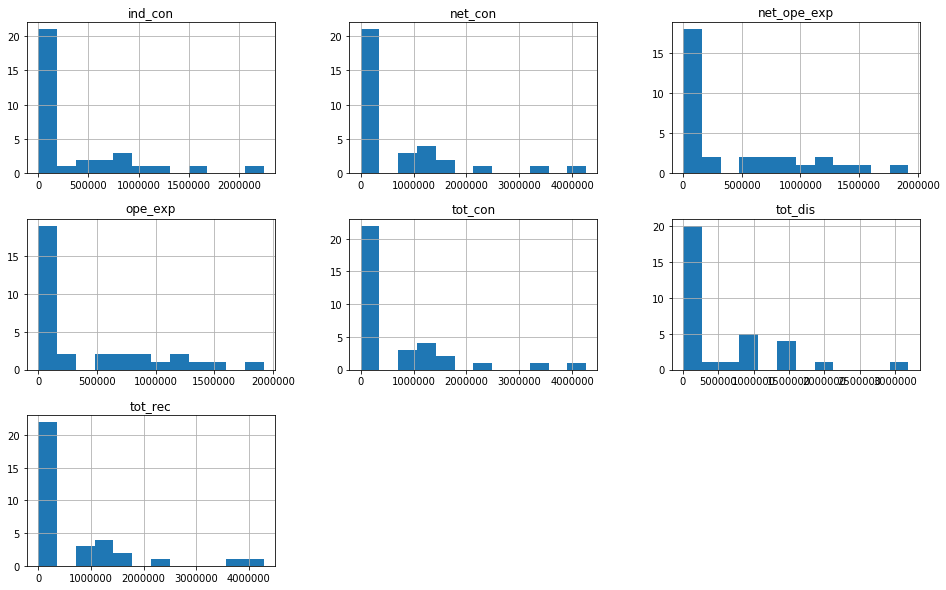

In [284]:
df_dem = data_df_new[data_df_new['can_off_dis'] == 12.0]

df_dem[retained_list].hist(figsize = (16, 10), bins = 12);

In [332]:
data_df_new['winner'] = data_df_new['winner'].fillna('N')

In [333]:
# dropping irrelevant columns

data_df_new = data_df_new.drop(columns = ['can_str1', 'can_str2', 'votes'])


In [334]:
data_df_new.isnull().sum()

can_id                   0
can_nam                  0
can_off                  0
can_off_sta              0
can_off_dis              2
can_par_aff              1
can_inc_cha_ope_sea      2
can_cit                  1
can_sta                  8
can_zip                 25
cov_sta_dat              0
cov_end_dat              0
ind_con                198
net_ope_exp            149
tot_con                119
tot_dis                 84
net_con                171
ope_exp                 97
tot_rec                 93
winner                   0
dtype: int64

In [335]:
final_data

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,ind_con,net_ope_exp,tot_con,tot_dis,net_con,ope_exp,tot_rec,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,601274.50,907156.21,1074949.50,978518.98,1074949.50,908518.98,1094022.76,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1114711.02,1298831.83,1417545.22,1313583.69,1406719.06,1300557.53,1419270.92,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,542105.38,656210.29,650855.38,675642.76,650855.38,656642.76,711287.85,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4317331.58,5055942.15,4980915.41,5200630.00,4938943.74,5073110.33,5190887.78,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,897123.61,949488.98,1205863.61,1112163.94,1197676.61,953436.94,1209811.57,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,P00004275,"BROWN, HARLEY D",P,US,0.0,NNE,OPEN,NAMPA,ID,83686.0,1/1/2015,7/8/2015,215.00,9655.02,12847.39,11683.89,10487.10,11683.89,12847.39,N
1793,H6NY11182,"LANE, JAMES",H,NY,11.0,GRE,OPEN,BROOKLYN,NY,11215.0,1/1/2015,7/7/2015,12889.00,13356.89,14241.00,13983.11,14241.00,13356.89,14241.00,N
1794,H6MS01164,"COLLINS, NANCY",H,MS,1.0,REP,OPEN,TUPELO,MS,38804.0,1/1/2015,7/1/2015,95538.35,247121.35,102538.35,247121.35,102538.35,247121.35,247121.35,N
1795,S6CA00618,"ALBERTSON, STEWART",S,CA,0.0,DEM,OPEN,REDWOOD CITY,CA,94065.0,1/1/2015,6/30/2015,18949.00,15221.00,20949.00,30949.00,15250.00,15221.00,30949.00,N


In [336]:
final_data.to_csv('new_project_data.csv', index=False)